In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

# Load the dataset
data = pd.read_csv('/Users/mateimocanu/Desktop/insurance.csv')

# Check for missing values
if data.isnull().sum().sum() > 0:
    data = data.dropna()

# One-hot encode categorical variables
encoder = OneHotEncoder()  # Removed the deprecated parameter
encoded_features = encoder.fit_transform(data[['sex', 'smoker', 'region']])
encoded_features_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(['sex', 'smoker', 'region']))

# Combine the original data with the encoded features
data = data.drop(['sex', 'smoker', 'region'], axis=1)
data = pd.concat([data, encoded_features_df], axis=1)

# Feature scaling
scaler = StandardScaler()
data[['age', 'bmi', 'children']] = scaler.fit_transform(data[['age', 'bmi', 'children']])

# Model definition
model = Sequential([
    Input(shape=(data.shape[1] - 1,)),  # Explicit Input layer
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Model summary
model.summary()


2024-04-17 19:25:12.553451: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,857 (38.50 KB)

 Trainable params: 9,857 (38.50 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
from sklearn.model_selection import train_test_split

# Assuming 'charges' is our target variable and all other columns are features
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_val, y_val))


Epoch 1/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32656924.0000 - mae: 3867.3286 - val_loss: 28553848.0000 - val_mae: 3673.1663
Epoch 2/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 29033180.0000 - mae: 3533.5471 - val_loss: 28226550.0000 - val_mae: 3608.7849
Epoch 3/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32272982.0000 - mae: 3652.4700 - val_loss: 28018154.0000 - val_mae: 3611.1169
Epoch 4/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35386664.0000 - mae: 3913.8462 - val_loss: 27737716.0000 - val_mae: 3559.6343
Epoch 5/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27917978.0000 - mae: 3444.6162 - val_loss: 27482154.0000 - val_mae: 3539.8457
Epoch 6/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 32339782.0000 - mae: 3651.3677 - val_loss: 27241464.0000 - val_mae: 3532.5947
Epoch 7/50
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31133890.0000 - mae: 3588.4651 - val_loss: 27081384.0000 - val_mae: 3548.5083
Epoch 8/50
107/107 ━━━━━━━━━━━━━━━

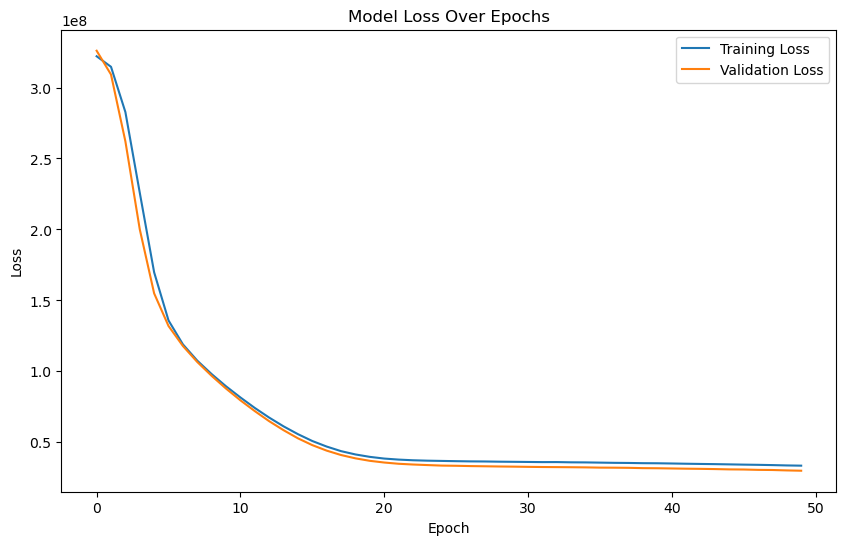

In [5]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Get the last recorded validation MAE from the model's training history
val_mae = history.history['val_mae'][-1]  # Make sure the key matches your history dictionary

# Calculate additional metrics
val_rmse = mean_squared_error(y_val, y_val_pred, squared=False)  # Set squared=False for RMSE
val_r2 = r2_score(y_val, y_val_pred)

# Now print the captured MAE along with the new metrics
print("Validation MAE: {:.4f}".format(val_mae))
print("Validation RMSE: {:.4f}".format(val_rmse))
print("Validation R-squared: {:.4f}".format(val_r2))



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Validation MAE: 3758.5286
Validation RMSE: 5458.0264
Validation R-squared: 0.8081


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


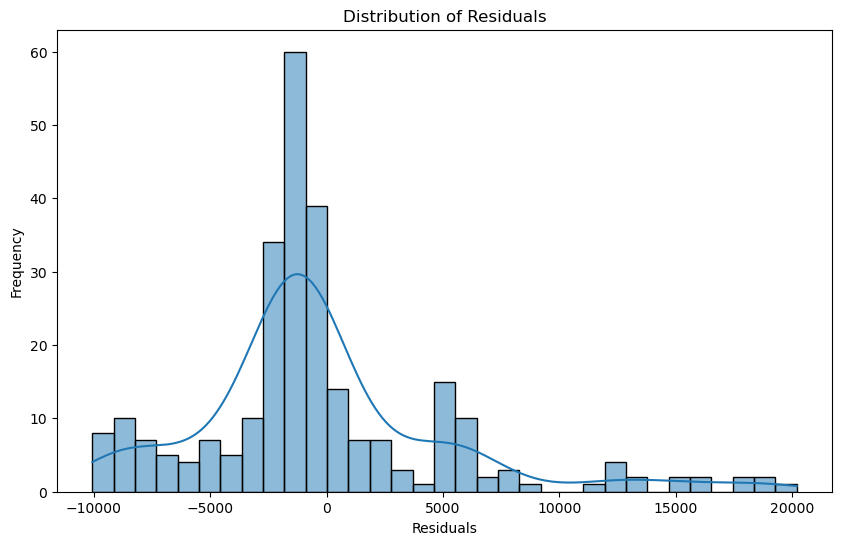

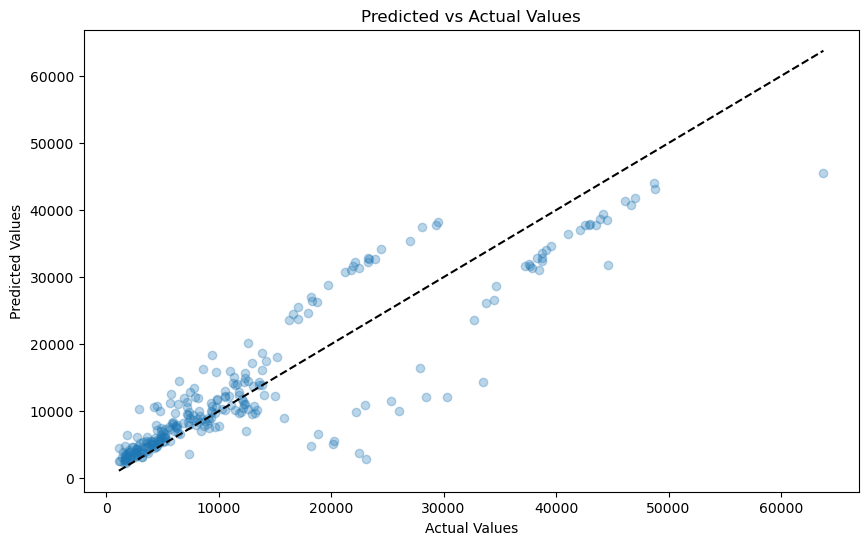

In [8]:
import seaborn as sns

# Calculate residuals
residuals = y_val - y_val_pred.flatten()

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.3)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--') # Diagonal line for reference
plt.show()


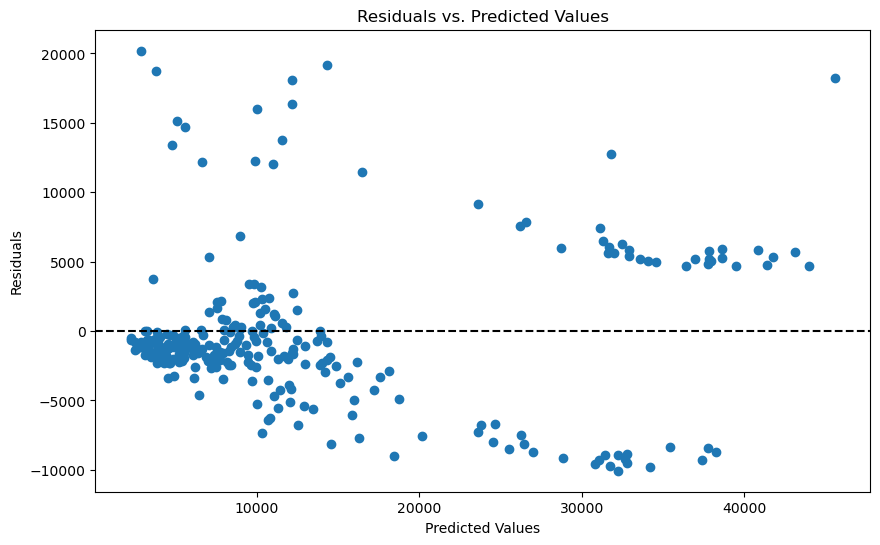

In [9]:
# Plot residuals to see if there's any pattern
plt.figure(figsize=(10, 6))
plt.scatter(y_val_pred, residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()




In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Input

# Define the K-fold cross validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Prepare cross-validation results storage
mae_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    # Split data
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]

    # Define the model architecture
    model_kf = Sequential()
    model_kf.add(Input(shape=(X_train_kf.shape[1],)))
    model_kf.add(Dense(128, activation='relu'))
    model_kf.add(Dense(64, activation='relu'))
    model_kf.add(Dense(1))
    
    # Compile the model
    model_kf.compile(optimizer='adam', loss='mse', metrics=['mae'])
    
    # Train the model
    model_kf.fit(X_train_kf, y_train_kf, epochs=50, batch_size=10, verbose=0)
    
    # Evaluate the model
    predictions = model_kf.predict(X_test_kf)
    fold_mae = mean_absolute_error(y_test_kf, predictions)
    mae_scores.append(fold_mae)

# Calculate the average MAE over all folds
average_mae = np.mean(mae_scores)
print(f"Average MAE over {num_folds} folds: {average_mae}")



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Average MAE over 5 folds: 3676.321472526442


In [15]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Perform cross-validation for the linear regression model
linear_mae_scores = []

for train_index, test_index in kf.split(X):
    # Split data
    X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
    y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    linear_model.fit(X_train_kf, y_train_kf)
    
    # Evaluate the model
    linear_predictions = linear_model.predict(X_test_kf)
    fold_mae = mean_absolute_error(y_test_kf, linear_predictions)
    linear_mae_scores.append(fold_mae)

# Calculate the average MAE over all folds for linear regression
linear_average_mae = np.mean(linear_mae_scores)
print(f"Average MAE for Linear Regression over {num_folds} folds: {linear_average_mae}")

# Compare performances
print(f"Difference in average MAE (Neural Network - Linear Regression): {average_mae - linear_average_mae}")


Average MAE for Linear Regression over 5 folds: 4203.412102606211
Difference in average MAE (Neural Network - Linear Regression): -527.0906300797692
